<p style="text-align: center;">
**CS514 Applied Artificial Intelligence<br>
Project5<br>
University of Illinois At Chicago<br>
Fall 2019**
</p>
<br>
**Project Title: ASHRAE – GREAT Energy Predictor 3
<br>
Domain: Energy
<br>
Author: TT_Dancer**

# How to run this script
*Pay attention to the RAM of your PC.* After testing, it’s better to have a **>8G RAM** computer to run the input datasets to avoid crashing down memory usage! 
> Firstly, assume you have python3 package installed and kaggle account created. 
>> 1. Run the notebook file online. Logon your kaggle account, select "ASHRAE-Great Energy Predictor 3" -> "Notebooks"-> "Your Work"-> click "Create New Notebook"->select "Notebook"; Click "File"-> "Upload notebook", then "run all".
>>
>> 2. Run the notebook offline in your PC. Assume that you have Jupyter Notebook installed, you can store this notebook file in directory "/kaggle/" and downloaded input data files from Kaggle in "/kaggle/input/ashrae-energy-prediction/". Then you can run this notebook file locally.
>> 
>**1-Online is preferred.**

In [233]:
# ====================================
# This is a project demo for CS514 Applied AI assignments as well as Kaggle submission format
# Author: TT_Dance
# ====================
# Packages and libraries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',100) #set column limits when displaying in the kernel
pd.set_option('display.max_rows',100) #set row limits when displaying in the kernel
pd.set_option('display.float_format', lambda x: '%.5f' % x) #set float decimal limits when displaying in the kernel
import seaborn as sns
#from time import time
import datetime
from sklearn.model_selection import train_test_split,KFold

In [234]:
# @TT_Dance
# Automatically generated by Kaggle Notebook
# @TT_Dance
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ashrae-energy-prediction/train.csv
/kaggle/input/ashrae-energy-prediction/building_metadata.csv
/kaggle/input/ashrae-energy-prediction/sample_submission.csv
/kaggle/input/ashrae-energy-prediction/weather_test.csv
/kaggle/input/ashrae-energy-prediction/weather_train.csv
/kaggle/input/ashrae-energy-prediction/test.csv


# 1,Loading data inputs

In [235]:
%%time
building_metadata = pd.read_csv("../input/ashrae-energy-prediction/building_metadata.csv")
sample_submission = pd.read_csv("../input/ashrae-energy-prediction/sample_submission.csv")
test = pd.read_csv("../input/ashrae-energy-prediction/test.csv")
train = pd.read_csv("../input/ashrae-energy-prediction/train.csv")
weather_test = pd.read_csv("../input/ashrae-energy-prediction/weather_test.csv")
weather_train = pd.read_csv("../input/ashrae-energy-prediction/weather_train.csv")

CPU times: user 38.4 s, sys: 6.57 s, total: 45 s
Wall time: 43.9 s


## QuickView of data

In [236]:
building_metadata.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.00000,1449.00000,1449.00000,675.00000,355.00000
mean,6.95238,724.00000,92111.77640,1967.95704,3.74085
std,5.00343,418.43458,110769.95100,31.05403,3.33368
min,0.00000,0.00000,283.00000,1900.00000,1.00000
25%,3.00000,362.00000,23012.00000,1949.00000,1.00000
50%,5.00000,724.00000,57673.00000,1970.00000,3.00000
75%,13.00000,1086.00000,115676.00000,1995.00000,5.00000
max,15.00000,1448.00000,875000.00000,2017.00000,26.00000


In [237]:
train.describe()

,building_id,meter,meter_reading
count,20216100.00000,20216100.00000,20216100.00000
mean,799.27800,0.66244,2117.12108
std,426.91331,0.93099,153235.62499
min,0.00000,0.00000,0.00000
25%,393.00000,0.00000,18.30000
50%,895.00000,0.00000,78.77500
75%,1179.00000,1.00000,267.98400
max,1448.00000,3.00000,21904700.00000


In [238]:
weather_train.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.00000,139718.00000,70600.00000,139660.00000,89484.00000,129155.00000,133505.00000,139469.00000
mean,7.47898,14.41811,2.14931,7.35016,0.98305,1016.15804,180.52663,3.56053
std,4.60474,10.62660,2.59915,9.79023,8.46368,7.62968,111.52363,2.33587
min,0.00000,-28.90000,0.00000,-35.00000,-1.00000,968.20000,0.00000,0.00000
25%,3.00000,7.20000,0.00000,0.60000,0.00000,1011.80000,80.00000,2.10000
50%,7.00000,15.00000,2.00000,8.30000,0.00000,1016.40000,190.00000,3.10000
75%,11.00000,22.20000,4.00000,14.40000,0.00000,1020.80000,280.00000,5.00000
max,15.00000,47.20000,9.00000,26.10000,343.00000,1045.50000,360.00000,19.00000


In [239]:
%%time
print ("------------building_metadata info-------------------------")
print (building_metadata.info(memory_usage='deep'))
print ("------------weather_train info-------------------------")
print (weather_train.info(memory_usage='deep'))
print ("------------weather_test info-------------------------")
print (weather_test.info(memory_usage='deep'))
print ("------------train info-------------------------")
print (train.info(memory_usage='deep'))
print ("------------test info-------------------------")
print (test.info(memory_usage='deep'))

------------building_metadata info-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
floor_count    355 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 155.5 KB
None
------------weather_train info-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            13

# 2,Preprocessing
## 2.1 Reduce Memory size by preallocate the data types for attributes
As we can see there are nearly 2 million training data points and 4 million test data points, they nearly use up the RAM. In order to make the training and test dataset run with less memory usage, let's do some preprocessing tricks to handle the dataset.


In [240]:
def coltype_transfer(df, testMode=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    int_types = [np.int8, np.int16, np.int32, np.int64]
    float_types = [np.float16, np.float32, np.float64]
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                for i_type in int_types:
                    if c_min > np.iinfo(i_type).min and c_max < np.iinfo(i_type).max:
                        df[col] = df[col].astype(i_type)
                        break
            else:
                for i_type in float_types:
                    if c_min > np.finfo(i_type).min and c_max < np.finfo(i_type).max:
                        df[col] = df[col].astype(i_type)
                        break    
    end_mem = df.memory_usage().sum() / 1024**2
    if testMode: 
        print('Memory usage decreased from %.4f to %.4f Mb by %.2f reduction)' %(start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [241]:
train_df = coltype_transfer(train)
test_df = coltype_transfer(test)
weather_train_df = coltype_transfer(weather_train)
weather_test_df = coltype_transfer(weather_test)
building_meta_df = coltype_transfer(building_metadata)

Memory usage decreased from 616.9465 to 289.1938 Mb by 53.12 reduction)
Memory usage decreased from 1272.5099 to 596.4891 Mb by 53.12 reduction)
Memory usage decreased from 9.5976 to 3.0660 Mb by 68.05 reduction)
Memory usage decreased from 19.0369 to 6.0813 Mb by 68.06 reduction)
Memory usage decreased from 0.0665 to 0.0264 Mb by 60.31 reduction)


# 3,EDA
**E**xploratory **D**ata **A**nalysis let us know the data and it's the process of transforming, visualizing, and summarizing data. It's and open-ended analysis.

## 3.1 Structure
These input files are all rectangular csv-formatted files. We know that
>building_metadata: it has site_id and building_id as primary keys. Besides, site_id is the foreign key of file weather_train and weather_test, building_id is the foreign key of file train and test.

In [242]:
# 3.1 timestamp transfer
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"], format='%Y-%m-%d %H:%M:%S')
test_df["timestamp"] = pd.to_datetime(test_df["timestamp"], format='%Y-%m-%d %H:%M:%S')
weather_train_df["timestamp"] = pd.to_datetime(weather_train_df["timestamp"], format='%Y-%m-%d %H:%M:%S')
weather_test_df["timestamp"] = pd.to_datetime(weather_test_df["timestamp"], format='%Y-%m-%d %H:%M:%S')

In [243]:
building_meta_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.00000,nan
1,0,1,Education,2720,2004.00000,nan
2,0,2,Education,5376,1991.00000,nan
3,0,3,Education,23685,2002.00000,nan
4,0,4,Education,116607,1975.00000,nan


In [244]:
# 3.2 Structure
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.00000
1,1,0,2016-01-01,0.00000
2,2,0,2016-01-01,0.00000
3,3,0,2016-01-01,0.00000
4,4,0,2016-01-01,0.00000


In [245]:
weather_train_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.00000,6.00000,20.00000,nan,1019.50000,0.00000,0.00000
1,0,2016-01-01 01:00:00,24.40625,nan,21.09375,-1.00000,1020.00000,70.00000,1.50000
2,0,2016-01-01 02:00:00,22.79688,2.00000,21.09375,0.00000,1020.00000,0.00000,0.00000
3,0,2016-01-01 03:00:00,21.09375,2.00000,20.59375,0.00000,1020.00000,0.00000,0.00000
4,0,2016-01-01 04:00:00,20.00000,2.00000,20.00000,-1.00000,1020.00000,250.00000,2.59961


In [246]:
weather_test_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.79688,4.00000,11.70312,nan,1021.50000,100.00000,3.59961
1,0,2017-01-01 01:00:00,17.79688,2.00000,12.79688,0.00000,1022.00000,130.00000,3.09961
2,0,2017-01-01 02:00:00,16.09375,0.00000,12.79688,0.00000,1022.00000,140.00000,3.09961
3,0,2017-01-01 03:00:00,17.20312,0.00000,13.29688,0.00000,1022.00000,140.00000,3.09961
4,0,2017-01-01 04:00:00,16.70312,2.00000,13.29688,0.00000,1022.50000,130.00000,2.59961


In [247]:
test_df.head()
# same as train

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01
1,1,1,0,2017-01-01
2,2,2,0,2017-01-01
3,3,3,0,2017-01-01
4,4,4,0,2017-01-01


## 3.2 Granularity intro
1. in building_metadata, each row represents a record of per building_id in per site_id
2. in train/test dataset, each row represents a record of one kind of meter-reading in per building_id
3. in weather_train/weather_test dataset, each row represents a record of weather condition in per site_id

In [248]:
# as mentioned in the documentation, there are four meter types
train_df['meter'].replace({0:"Electricity",1:"ChilledWater",2:"Steam",3:"HotWater"},inplace=True)
test_df['meter'].replace({0:"Electricity",1:"ChilledWater",2:"Steam",3:"HotWater"},inplace=True)

In [249]:
train_df.groupby('meter')['meter_reading'].agg(['min','max','mean','median','count','std'])

,min,max,mean,median,count,std
meter,,,,,,
ChilledWater,0.00000,880374.00000,633.36395,120.48700,4182440,7988.21289
Electricity,0.00000,79769.00000,170.82564,62.83190,12060910,380.83429
HotWater,0.00000,160187.00000,385.86679,39.62370,1264037,2508.17261
Steam,0.00000,21904700.00000,13882.18750,257.81201,2708713,418313.50000


## 3.3 Temporality
We would like to see how the training data change along with the time

In [250]:
print("The time range of train.csv file is from %s to %s" %(train_df["timestamp"].min(), train_df["timestamp"].max()))
print("The time range of weather_train.csv file is from %s to %s" %(weather_train_df["timestamp"].min(), weather_train_df["timestamp"].max()))

The time range of train.csv file is from 2016-01-01 00:00:00 to 2016-12-31 23:00:00
The time range of weather_train.csv file is from 2016-01-01 00:00:00 to 2016-12-31 23:00:00


Both train.csv and weather_train.csv files have same time range

In [251]:
for df in [train_df, test_df]:
    df['Month'] = df['timestamp'].dt.month.astype("int8")
    df['DayOfMonth'] = df['timestamp'].dt.day.astype("int8")
    df['DayOfWeek'] = df['timestamp'].dt.dayofweek.astype("int8")
    df['Hour'] = df['timestamp'].dt.hour.astype("int8")

Text(0.5, 1.0, 'Graph of Average Meter Reading')

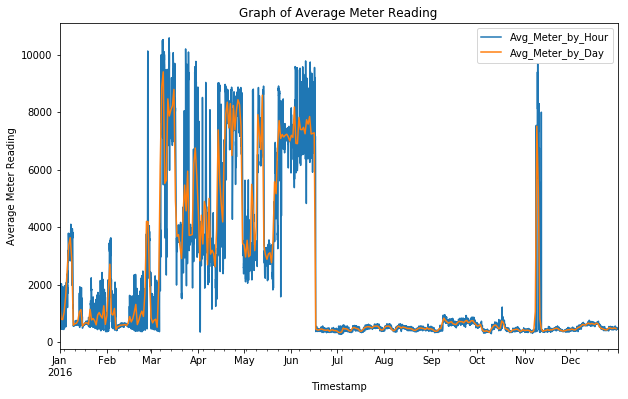

In [252]:
train_df[['timestamp','meter_reading']].set_index('timestamp').resample("H")['meter_reading'].mean().plot(kind='line',figsize=(10,6),label='Avg_Meter_by_Hour')
train_df[['timestamp','meter_reading']].set_index('timestamp').resample("D")['meter_reading'].mean().plot(kind='line',figsize=(10,6),label='Avg_Meter_by_Day')
plt.legend()
plt.xlabel("Timestamp")
plt.ylabel("Average Meter Reading")
plt.title("Graph of Average Meter Reading")

We can see that the ups and downs in the plotting which means that the meter_reading might drop during off-office hours, weekends or holidays.

## 3.4 Scope-Missing Values/Outliers & Makeup
### 3.4.1 looking into the missing values
As we can see, it's noticable that in building_metadata, weather_train, weather_test has nan values. Let's check them.

In [253]:
def missing_ratio_from_rawdata(df_train, *df_tests):
    temp = pd.DataFrame(df_train.isna().sum()/len(df_train),columns=["Train_Missing_Pct"])
    idx = 0
    for df_test in df_tests:
        temp["Test_Missing_Pct"+str(idx)] = df_test.isna().sum()/len(df_test)
        idx += 1
    display(temp)

In [254]:
missing_ratio_from_rawdata(train_df, test_df)
# There is no missing value in train and test dataset

,Train_Missing_Pct,Test_Missing_Pct0
building_id,0.00000,0.00000
meter,0.00000,0.00000
timestamp,0.00000,0.00000
meter_reading,0.00000,nan
Month,0.00000,0.00000
DayOfMonth,0.00000,0.00000
DayOfWeek,0.00000,0.00000
Hour,0.00000,0.00000


In [255]:
missing_ratio_from_rawdata(weather_train_df, weather_test_df)
# There are nearly similar missing values in columns air_temperature, cloud_coverage, precip_depth_1_hr, sea_level_pressure etc in both
# weather_train and weather_test files.

,Train_Missing_Pct,Test_Missing_Pct0
site_id,0.00000,0.00000
timestamp,0.00000,0.00000
air_temperature,0.00039,0.00038
cloud_coverage,0.49490,0.50659
dew_temperature,0.00081,0.00118
precip_depth_1_hr,0.35979,0.34478
sea_level_pressure,0.07597,0.07670
wind_direction,0.04484,0.04462
wind_speed,0.00217,0.00166


As we can see that cloud_coverage and precip_depth_1_hr are the top two missing value attributes, let's see the statistics and visualization of these two columns.

### 3.4.2 looking into shapes/outliers
#### For train.csv files

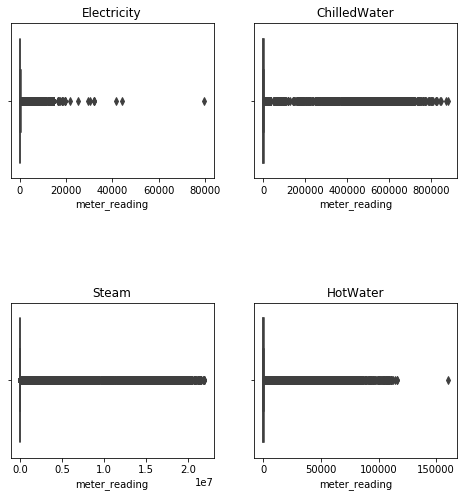

In [256]:
# for train.csv file
f, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.boxplot(train_df[train_df['meter'] == "Electricity"]['meter_reading'], ax=axes[0][0])
axes[0][0].set_title("Electricity")
sns.boxplot(train_df[train_df['meter'] == "ChilledWater"]['meter_reading'], ax=axes[0][1])
axes[0][1].set_title("ChilledWater")
sns.boxplot(train_df[train_df['meter'] == "Steam"]['meter_reading'], ax=axes[1][0])
axes[1][0].set_title("Steam")
sns.boxplot(train_df[train_df['meter'] == "HotWater"]['meter_reading'], ax=axes[1][1])
axes[1][1].set_title("HotWater")
plt.subplots_adjust(hspace = 0.8)

From the plotting above, we can see there are some outliers in meter_readings in "Electricity" and "Hotwater".

Text(0.5, 1.0, 'Distribution of Log of Meter Reading Variable')

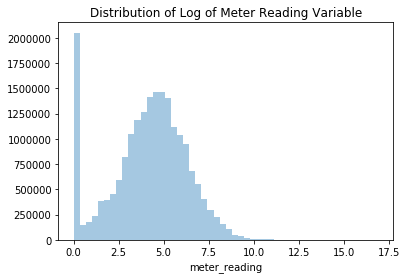

In [257]:
train_df['meter_reading'] = np.log1p(train_df['meter_reading'])
sns.distplot(train_df['meter_reading'],kde=False)
plt.title("Distribution of Log of Meter Reading Variable")

As we can see that there are a lot of zeros in the meter_reading.
#### For weather_train.csv file

In [258]:
weather_train_df.describe()
# min is 0 for cloud_coverage, and max is 9 for cloud_coverage
# mis is -1 for precip_depth_1_hr, and 343.00000 for precip_depth_1_hr, these min and max seems to be anomalies for precip_depth_1_hr

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.00000,139718.00000,70600.00000,139660.00000,89484.00000,129155.00000,133505.00000,139469.00000
mean,7.47898,nan,nan,nan,nan,nan,nan,nan
std,4.60474,0.00000,0.00000,0.00000,nan,nan,nan,0.00000
min,0.00000,-28.90625,0.00000,-35.00000,-1.00000,968.00000,0.00000,0.00000
25%,3.00000,7.19922,0.00000,0.60010,0.00000,1012.00000,80.00000,2.09961
50%,7.00000,15.00000,2.00000,8.29688,0.00000,1016.50000,190.00000,3.09961
75%,11.00000,22.20312,4.00000,14.39844,0.00000,1021.00000,280.00000,5.00000
max,15.00000,47.18750,9.00000,26.09375,343.00000,1046.00000,360.00000,19.00000


In [259]:
weather_test_df.describe()
# min is 0 for cloud_coverage, and -1 for precip_depth_1_hr
# max is 9 for cloud_coverage, and 597.00000 for precip_depth_1_hr

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,277243.00000,277139.00000,136795.00000,276916.00000,181655.00000,255978.00000,264873.00000,276783.00000
mean,7.48465,nan,nan,nan,nan,nan,nan,nan
std,4.61696,0.00000,0.00000,0.00000,nan,nan,nan,0.00000
min,0.00000,-28.09375,0.00000,-31.59375,-1.00000,972.00000,0.00000,0.00000
25%,3.00000,7.19922,0.00000,0.60010,0.00000,1011.50000,80.00000,2.09961
50%,7.00000,15.00000,2.00000,8.39844,0.00000,1016.50000,190.00000,3.09961
75%,12.00000,22.20312,4.00000,15.00000,0.00000,1021.00000,280.00000,4.60156
max,15.00000,48.31250,9.00000,26.70312,597.00000,1050.00000,360.00000,24.20312


1, There are negative values in air_temperature, dew_temperature and precip_depth_1_hr variables

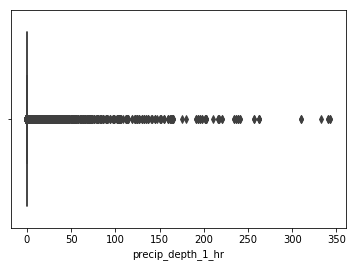

In [260]:
sns.boxplot(weather_train_df[weather_train_df['precip_depth_1_hr'].notna()]['precip_depth_1_hr'])
# There are some outliers in the precip_depth_1_hr

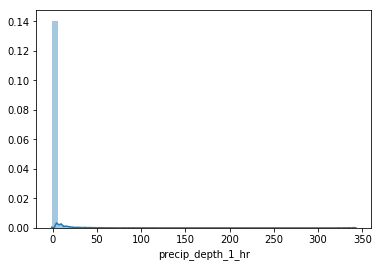

In [261]:
# visualize the scope and frequency of non-NAN 'cloud_coverage'
sns.distplot(weather_train_df[weather_train_df['precip_depth_1_hr'].notna()]['precip_depth_1_hr'])
# lots of zero count in the precip_depth_1_hr

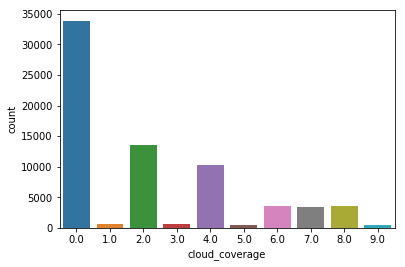

In [262]:
# visualize the scope and frequency of non-NAN 'cloud_coverage'
sns.countplot(weather_train_df[weather_train_df['cloud_coverage'].notna()]['cloud_coverage'])

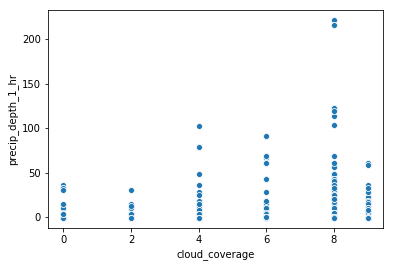

In [263]:
non_naprecip = weather_train_df[weather_train_df['precip_depth_1_hr'].notna()]['precip_depth_1_hr']
non_naprecip_cloud = weather_train_df[weather_train_df['precip_depth_1_hr'].notna()]['cloud_coverage']
sns.scatterplot(x=non_naprecip_cloud, y=non_naprecip, data=weather_train_df[weather_train_df['precip_depth_1_hr'].notna()])
#we can see more clearly that there are some outliers in cloud_coverage=8

#### For building_metadata.csv file

In [264]:
building_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int8
building_id    1449 non-null int16
primary_use    1449 non-null object
square_feet    1449 non-null int32
year_built     675 non-null float16
floor_count    355 non-null float16
dtypes: float16(2), int16(1), int32(1), int8(1), object(1)
memory usage: 27.0+ KB


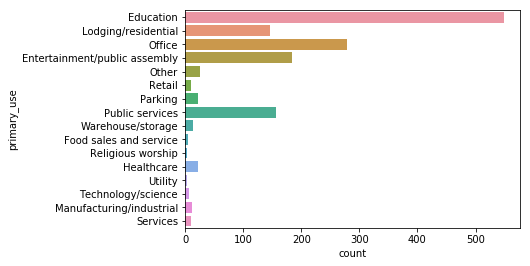

In [265]:
sns.countplot(y="primary_use", data=building_meta_df)

From this graph, it shows that nearly half of primary use types are rare. We could combine them together in "Other" type. Keep "Education", "Lodging/residential", "Office", "Entertainment/public assembly", "Public services".

In [266]:
building_meta_df['primary_use'].replace({"Healthcare":"Other","Parking":"Other","Warehouse/storage":"Other","Manufacturing/industrial":"Other",
                                "Retail":"Other","Services":"Other","Technology/science":"Other","Food sales and service":"Other",
                                "Utility":"Other","Religious worship":"Other"},inplace=True)

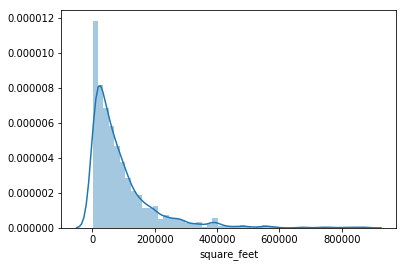

In [267]:
sns.distplot(building_meta_df["square_feet"])
# The tickes for x-axis is too large, let's use log-transformation to downscale it

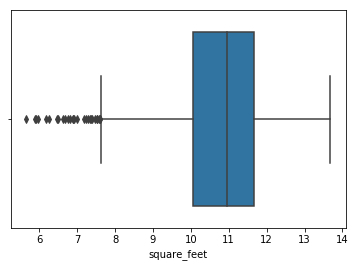

In [268]:
building_meta_df["square_feet"] = building_meta_df["square_feet"].apply(np.log1p)
building_meta_df["square_feet"] = building_meta_df["square_feet"].astype("float16")
sns.boxplot(building_meta_df["square_feet"])
# As we can see there are some outliers in squarefeet from 1 to 2.2 log1p(square_feet)

#### 3.4.3 outliers handling
You can reference [this blog](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) to do outliers handling, here we are going to use IQR Score to handle them.****

In [269]:
def outlier_removal(df, colname):
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[colname] < (Q1 - 1.5 * IQR)) | (df[colname] > (Q3 + 1.5 * IQR)))]
    return df

In [270]:
print("Bef removal, shape is %d, %d" %(weather_train_df.shape))
weather_train_df = outlier_removal(weather_train_df, "precip_depth_1_hr")
print("Aft removal, shape is %d, %d" %(weather_train_df.shape))

Bef removal, shape is 139773, 9
Aft removal, shape is 128199, 9


#### 3.4.3 Makeup missing data

In [271]:
def makeup_data(df, colname, strategy="median"):
    m_col = 0.0
    if strategy == "median":
        m_col = df[df[colname].notna()][colname].median()
    elif strategy == "min":
        m_col = df[df[colname].notna()][colname].min()
    elif strategy == "max":
        m_col = df[df[colname].notna()][colname].max()
    else:
        m_col = df[df[colname].notna()][colname].mean()
    df[colname].fillna(m_col, inplace=True)
    return df

In [272]:
col_names = ["air_temperature", "cloud_coverage", "dew_temperature", "precip_depth_1_hr", "sea_level_pressure", "wind_direction", "wind_speed"]
for col_name in col_names:
    weather_train_df = makeup_data(weather_train_df, col_name)
    weather_test_df = makeup_data(weather_test_df, col_name)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/co

In [273]:
# check after makeup
missing_ratio_from_rawdata(weather_train_df, weather_test_df)

,Train_Missing_Pct,Test_Missing_Pct0
site_id,0.00000,0.00000
timestamp,0.00000,0.00000
air_temperature,0.00000,0.00000
cloud_coverage,0.00000,0.00000
dew_temperature,0.00000,0.00000
precip_depth_1_hr,0.00000,0.00000
sea_level_pressure,0.00000,0.00000
wind_direction,0.00000,0.00000
wind_speed,0.00000,0.00000


In [274]:
missing_ratio_from_rawdata(building_meta_df)
# There are nearly 3/4 floor_count is missing, it could have less impact in our prediction, so let's drop it at this step.
# And we use the minimum to fill in the nan value in year_built attribute

,Train_Missing_Pct
site_id,0.00000
building_id,0.00000
primary_use,0.00000
square_feet,0.00000
year_built,0.53416
floor_count,0.75500


In [275]:
building_meta_df.drop('floor_count', axis=1, inplace=True)

In [276]:
building_meta_df = makeup_data(building_meta_df, "year_built")

In [277]:
missing_ratio_from_rawdata(building_meta_df)

,Train_Missing_Pct
site_id,0.00000
building_id,0.00000
primary_use,0.00000
square_feet,0.00000
year_built,0.00000


## 3.5 Merging Data

In [278]:
# concatenate data with train/test.csv and building_metadata.csv
train_df = pd.merge(train_df,building_meta_df,on='building_id',how='left')
test_df  = pd.merge(test_df,building_meta_df,on='building_id',how='left')
print ("Training Data Shape {}".format(train_df.shape))
print ("Testing Data Shape {}".format(test_df.shape))
gc.collect()

Training Data Shape (20216100, 12)
Testing Data Shape (41697600, 12)


7846

In [279]:
# concatenate data with train/test.csv and weather_train/test.csv
train_df = train_df.merge(weather_train_df,on=['site_id','timestamp'],how='left')
test_df  = test_df.merge(weather_test_df,on=['site_id','timestamp'],how='left')
print ("Training Data Shape {}".format(train_df.shape))
print ("Testing Data Shape {}".format(test_df.shape))
gc.collect()

Training Data Shape (20216100, 19)
Testing Data Shape (41697600, 19)


0

# 4,Feature Engineering
## 4.1 Expanding some more features
Like Holidays and Weekend which might influence the usage of energy

In [280]:
print("The time range of test.csv file is from %s to %s" %(test_df["timestamp"].min(), test_df["timestamp"].max()))
print("The time range of weather_test.csv file is from %s to %s" %(weather_test_df["timestamp"].min(), weather_test_df["timestamp"].max()))

The time range of test.csv file is from 2017-01-01 00:00:00 to 2018-12-31 23:00:00
The time range of weather_test.csv file is from 2017-01-01 00:00:00 to 2018-12-31 23:00:00


In [281]:
public_holidays = ["2016-01-01", "2016-01-18", "2016-05-30", "2016-07-04",
                "2016-09-05", "2016-11-11", "2016-11-24", "2016-12-26",
                "2017-01-02", "2017-01-16", "2017-05-29", "2017-07-04",
                "2017-09-04", "2017-11-10", "2017-11-23", "2017-12-25",
                "2018-01-01", "2018-01-15", "2018-05-28", "2018-07-04",
                "2018-09-03", "2018-11-12", "2018-11-22", "2018-12-05",
                "2018-12-25", "2019-01-01"]
def allweekends(year):
    sundays = pd.date_range(start=str(year), end=str(year+3), 
                         freq='W-SUN').strftime('%Y-%m-%d').tolist()
    saturdays = pd.date_range(start=str(year), end=str(year+3), 
                         freq='W-SAT').strftime('%Y-%m-%d').tolist()
    return saturdays + sundays
weekends = allweekends(2016)

for df in [train_df,test_df]:
    df["Holiday"] = (df.timestamp.isin(public_holidays)).astype("int8")
    df["Weekend"] = (df.timestamp.isin(weekends)).astype("int8")

### Using labelEncoder transform the categorical date to numerical one.
You can also try oneHotEncoder which could derive some more columns. To save time, we use LabelEncoder instead.

In [282]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['meter']= le.fit_transform(train_df['meter']).astype("int8")
test_df['meter']= le.fit_transform(test_df['meter']).astype("int8")
train_df['primary_use']= le.fit_transform(train_df['primary_use']).astype("int8")
test_df['primary_use']= le.fit_transform(test_df['primary_use']).astype("int8")

In [283]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 21 columns):
building_id           int16
meter                 int8
timestamp             datetime64[ns]
meter_reading         float32
Month                 int8
DayOfMonth            int8
DayOfWeek             int8
Hour                  int8
site_id               int8
primary_use           int8
square_feet           float16
year_built            float16
air_temperature       float16
cloud_coverage        float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
Holiday               int8
Weekend               int8
dtypes: datetime64[ns](1), float16(9), float32(1), int16(1), int8(9)
memory usage: 944.7 MB


In [284]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41697600 entries, 0 to 41697599
Data columns (total 21 columns):
row_id                int32
building_id           int16
meter                 int8
timestamp             datetime64[ns]
Month                 int8
DayOfMonth            int8
DayOfWeek             int8
Hour                  int8
site_id               int8
primary_use           int8
square_feet           float16
year_built            float16
air_temperature       float16
cloud_coverage        float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
Holiday               int8
Weekend               int8
dtypes: datetime64[ns](1), float16(9), int16(1), int32(1), int8(9)
memory usage: 1.9 GB


#### Separate out the Training attributes and Labels

In [285]:
label = train_df["meter_reading"]
train_df.drop(['meter_reading'],axis=1,inplace=True)
train_df.drop(['timestamp'],axis=1,inplace=True)
test_df.drop(['timestamp'],axis=1,inplace=True)

# 5,Model Selection
You can use either LogicRegress or RFC(Random Forest Classifier). This time I am going to recommend a gradient boosted tree-based algorithm: **LightGBM**, which is faster and performs well on categorical data.
1. Params for the classifier is not tuned yet. Currently most of the hyperparameters are fixed. This could be improved in next phase if possible.
2. boost_round is currently set to 3000 for running time consideration, you could have more rounds to train a better classifier/predictor.

In [286]:
import lightgbm as lgb

x_train,x_test,y_train,y_test = train_test_split(train_df,label,test_size=0.25,random_state=42)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

lgb_train = lgb.Dataset(x_train, y_train)
lgb_test = lgb.Dataset(x_test, y_test)
del x_train, x_test , y_train, y_test

params = {'feature_fraction': 0.8,
          'bagging_fraction': 0.8,
          'objective': 'regression',
          'max_depth': -1,
          'learning_rate': 0.2,
          "boosting_type": "gbdt",
          "bagging_seed": 10,
          "metric": 'rmse',
          "num_leaves": 36}

reg = lgb.train(params, lgb_train, num_boost_round=3000, valid_sets=[lgb_train, lgb_test], early_stopping_rounds=100, verbose_eval = 100)

(15162075, 19)
(15162075,)
(5054025, 19)
(5054025,)
Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.16693	valid_1's rmse: 1.16782
[200]	training's rmse: 1.0316	valid_1's rmse: 1.0329
[300]	training's rmse: 0.949507	valid_1's rmse: 0.950814
[400]	training's rmse: 0.894955	valid_1's rmse: 0.896522
[500]	training's rmse: 0.86299	valid_1's rmse: 0.864679
[600]	training's rmse: 0.832777	valid_1's rmse: 0.83482
[700]	training's rmse: 0.81103	valid_1's rmse: 0.81329
[800]	training's rmse: 0.791543	valid_1's rmse: 0.794191
[900]	training's rmse: 0.776136	valid_1's rmse: 0.77904
[1000]	training's rmse: 0.762126	valid_1's rmse: 0.765472
[1100]	training's rmse: 0.750278	valid_1's rmse: 0.753938
[1200]	training's rmse: 0.739803	valid_1's rmse: 0.743746
[1300]	training's rmse: 0.728225	valid_1's rmse: 0.732431
[1400]	training's rmse: 0.718452	valid_1's rmse: 0.722973
[1500]	training's rmse: 0.707994	valid_1's rmse: 0.712871
[1600]	training's rmse: 0.700826	val

From above training result, we can conclude that the temporary best RMSE result for the training dataset and validation dataset are 0.6287 and 0.6383.

# 6,Prediction

In [ ]:
prediction = []
step = 100000
for i in range(0, len(test_df), step):
    prediction.extend(np.expm1(reg.predict(test_df.iloc[i: min(i+step, len(test)), :], num_iteration=reg.best_iteration)))

In [ ]:
sample_submission['meter_reading'] = prediction
sample_submission.to_csv("output.csv",index=None)

# Future
As these input files are huge and time-consuming running, I just made an initial attempt and highlight the main features and tricks which I use in this project with less time to improve the performance.<br>
However, the performance could be improved from below aspects:
1, Use GPU instead of CPU to run the project to save much more time in testing
2, Use coefficient to investigate the relationship between different attributes/columns in the training datasets. Select relatively independent ones to save the time
3, Use better outliers handling/missing-value tricks in this blog (highlighted in the reference below

# Reference
1. Sabber Ahamed , Machine learning algorithm can help us to estimate the risk of financial decision, Aug,24, 2018,  https://towardsdatascience.com/financial-data-analysis-51e7275d0ae
2. Natasha Sharma, Ways to Detect and Remove the Outliers, May 22, 2018, https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
3. Hafeez, Jimoh, The tale of missing values in Python, Jan 6, 2018, https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d
4. lightgbm.io, https://lightgbm.readthedocs.io/en/latest/Python-API.html#training-api
5. Sunny Srinidhi, medium Encoder vs. OneHotEncoder, Jul 30, 2018 https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
6. seaborn.pydata.org, https://seaborn.pydata.org/generated/
7. kaggle competition documentation and sample https://www.kaggle.com/kulkarnivishwanath/ashrae-great-energy-predictor-iii-eda-model/notebook#Dependent-Variable